## Here we perform Principal component analysis on the cleaned dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### load the dataset

df = pd.read_csv('../Stats Dataset Cleaned/Stats Dataset Cleaned.csv')
df.head()

,Year,Territory of asylum or residence,Location Name,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,2001,Afghanistan,Kabul,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
1,2001,Afghanistan,Various,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0
2,2001,Afghanistan,Herat,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2001,Angola,Viana,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0
4,2001,Angola,Moxico,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0


In [3]:
df.columns

Index(['Year', 'Territory of asylum or residence', 'Location Name',
       'Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59',
       'Female 60+', 'F: Unknown', 'F: Total', 'Male 0-4', 'Male 5-11',
       'Male 5-17', 'Male 18-59', 'Male 60+', 'M: Unknown', 'M: Total'],
      dtype='object')

In [4]:
### dropping the unecessary columns which are not numeric

df.drop(columns=['Year', 'Territory of asylum or residence', 'Location Name'], axis=1, inplace=True)

In [5]:
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0
4,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0


In [6]:
### combining the total male and female population into one single output feature

df['Total Population'] = pd.to_numeric(df['F: Total'], errors='coerce') + pd.to_numeric(df['M: Total'], errors='coerce')


In [7]:
df.drop(columns=['F: Total', 'M: Total'], axis=1, inplace=True)
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,Total Population
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,1216624.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,597.0,0.0,1645.0,787.0,34.0,0.0,6559.0
4,219.0,0.0,0.0,427.0,25.0,0.0,226.0,0.0,711.0,139.0,15.0,0.0,2496.0


### Now we have a dataset with only numeric features. Now we split the features into independent and dependent features as x and y respectively. 

In [8]:
x=df.drop('Total Population', axis=1)
y=df['Total Population']

## Standardize the data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaler.fit(df)

StandardScaler()

In [12]:
scaled_data=scaler.transform(df)

In [11]:
### Applying PCA
### n=2 tells that we want 2 principal components that capture the most variance. 
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [13]:
data_pca=pca.fit_transform(scaled_data)

In [14]:
data_pca 

array([[-0.44554721,  0.08751614],
       [16.53753414, 14.0376326 ],
       [-0.44556736,  0.08751091],
       ...,
       [ 0.05960693, -0.06910717],
       [-0.38554474,  0.06112631],
       [-0.20385713, -0.03203713]])

In [15]:
### the variance captured by the principal component line found out by doing PCA.

pca.explained_variance_

array([8.90933586, 2.28559404])

Text(0, 0.5, 'Second Principal Component')

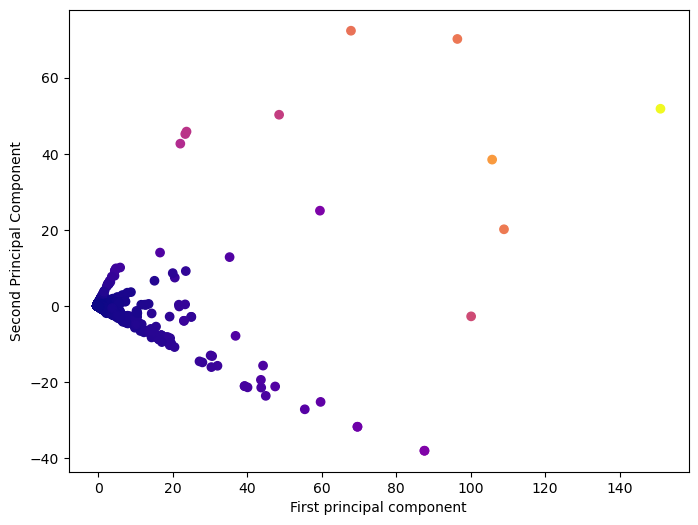

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=df['Total Population'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [20]:
### Storing the PCA data into a csv file
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_df['Total Population'] = df['Total Population']
pca_df.to_csv('../Dataset with PCA/pca_demographics.csv', index=False)
print("PCA data saved to pca_transformed_data.csv")

PCA data saved to pca_transformed_data.csv
